In [ ]:
## 1
library(dplyr)
library(tidyr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
setwd("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/mitochondria_data_2025.4.11/results_plots/2025.4.19")

In [3]:
# 设置TCMA文件夹路径
folder_path <- "TCMA"

# 读取所有文件
file_list <- list.files(folder_path, full.names = TRUE)

In [4]:
length(file_list)

[1] 36

In [5]:
file_list[1]

[1] "TCMA/Acute Myeloid Leukemia.txt"

In [10]:
library(dplyr)
library(readr)
library(purrr)
library(stringr)

# 假设 file_list 是文件路径的向量
result <- map_df(file_list, function(f) {
  dat <- read_tsv(f, locale = locale(encoding = "UTF-16LE"), show_col_types = FALSE)
  n_samples <- n_distinct(dat$Sample)         # 统计 Sample 的唯一数
  
  tibble(
    file = str_remove(basename(f), "\\.txt$"), # 如果是 .csv 就改成 \\.csv$
    sample_count = n_samples
  )
})

print(result)


# A tibble: 36 × 2
   file                             sample_count
   <chr>                                   <int>
 1 Acute Myeloid Leukemia                      5
 2 Biliary Tract Cancer                       12
 3 Bladder Cancer                             19
 4 Bone Cancer                                50
 5 Brain Glioblastoma Multiforme              28
 6 Brain Lower Grade Glioma                   16
 7 Breast Cancer                             199
 8 Cervical Squamous Cell Carcinoma           14
 9 Chronic Lymphocytic Leukemia               66
10 Chronic Myeloid Disorders                  19
# ℹ 26 more rows


In [12]:
write.table(result,"/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted/data/TCMA_cancer_sample_counts.csv",sep=",",quote=T)

In [5]:
# 初始化空数据框
all_data <- data.frame()

# 循环读取每个文件并处理
for (file in file_list) {
  temp <- read_tsv(file, locale = locale(encoding = "UTF-16LE"), show_col_types = FALSE)
  # 只保留前两列
  temp <- temp[, 1:2]
  # 去重复
  temp <- distinct(temp) 
  # 合并到总数据框
  all_data <- bind_rows(all_data, temp)
}

# 再去一次全局重复
all_data <- distinct(all_data)

# 去掉第二列中的"MT-"
all_data[, 2] <- gsub("MT-", "", all_data[, 2])

In [6]:
# 去掉第二列中为"N/A"的行
all_data <- all_data[all_data[, 2] != "N/A", ]

# 如果还想顺便去除真正的 NA（不是字符串），可以加一句：
all_data <- na.omit(all_data)

In [7]:
dim(all_data)

[1] 874   2

In [8]:
# 保存处理后的合并数据
write.table(all_data, "TCMA_cancer_mutation_gene.csv", sep = ",", quote = FALSE, row.names = FALSE)


In [13]:
setwd("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted")

In [15]:
all_data=read.table("data/TCMA_cancer_mutation_gene.csv",sep=",",quote="",header=T)
sample_count=read.csv('data/TCMA_cancer_sample_counts.csv',sep=",",quote="",header=T)

In [24]:
sample_count <- sample_count %>%
  mutate(Cancer_Type_label = paste0(Cancer_Type, " (n=", sample_count, ")"))

# 把标签和原始数据对应起来
all_data1 <- merge(all_data,sample_count[,c(1,3)],by.x=1,by.y=1)

In [27]:
all_data=all_data1[,c(3,2)]

In [28]:
head(all_data)

,Cancer_Type_label,Gene
,<chr>,<chr>
1,Acute Myeloid Leukemia (n=5),ATP6
2,Acute Myeloid Leukemia (n=5),COX2
3,Acute Myeloid Leukemia (n=5),COX3
4,Acute Myeloid Leukemia (n=5),CYTB
5,Acute Myeloid Leukemia (n=5),ND1
6,Acute Myeloid Leukemia (n=5),ND2


In [29]:
# 生成二值矩阵

# 提取所有唯一的基因（第二列）
genes <- unique(all_data[, 2])

# 提取所有样本（第一列）
samples <- unique(all_data[, 1])

# 创建一个空白矩阵，行是genes，列是samples
binary_matrix <- matrix(0, nrow = length(samples), ncol = length(genes),
                        dimnames = list(samples, genes))


In [30]:
tail(binary_matrix)

,ATP6,COX2,COX3,CYTB,ND1,ND2,ND4,ND5,RNR1,RNR2,⋯,TQ,TS2,OLR,TER,TK,TL2,TS1,TV,TY,TC
Pediatric Brain Cancer (n=115),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Prostate Adenocarcinoma (n=155),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Rectum Adenocarcinoma (n=16),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Sarcoma (n=23),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Skin Cutaneous melanoma (n=28),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Uterine Corpus Endometrial Carcinoma (n=43),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [31]:
# 根据all_data填充1
for (i in 1:nrow(all_data)) {
  sample <- all_data[i, 1]
  gene <- all_data[i, 2]
  binary_matrix[sample,gene] <- 1
}

In [32]:
head(binary_matrix)

,ATP6,COX2,COX3,CYTB,ND1,ND2,ND4,ND5,RNR1,RNR2,⋯,TQ,TS2,OLR,TER,TK,TL2,TS1,TV,TY,TC
Acute Myeloid Leukemia (n=5),1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
Biliary Tract Cancer (n=12),1,1,1,1,1,0,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
Bladder Cancer (n=19),1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
Bone Cancer (n=50),0,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
Brain Glioblastoma Multiforme (n=28),1,1,1,1,1,1,1,1,0,1,⋯,1,1,0,0,0,0,0,0,0,0
Brain Lower Grade Glioma (n=16),0,1,1,1,1,0,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0


In [33]:
# 保存二值矩阵
write.table(binary_matrix, "data/TCMA_cancer_gene_01_matrix.csv", sep = ",", quote = FALSE, col.names = NA)

In [34]:
library(ComplexHeatmap)
library(circlize) # 专门配色渐变用

Loading required package: grid



ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualizati

In [35]:
# 1. 统计每个基因出现次数（列的和）
gene_counts <- colSums(binary_matrix)

# 2. 基因按出现次数降序排列，同时对相同的出现次数按字母表排序
gene_order <- order(-gene_counts, names(gene_counts))
binary_matrix_ordered <- binary_matrix[, gene_order]

# 3. 统计每个癌症包含的基因个数（行的和）
cancer_gene_counts <- rowSums(binary_matrix_ordered)

# 4. 癌症按包含的基因个数降序排列，同时对相同的基因个数按字母表排序
cancer_order <- order(-cancer_gene_counts, names(cancer_gene_counts))
binary_matrix_ordered <- binary_matrix_ordered[cancer_order, ]

# 5. 把矩阵转换为因子，确保离散色彩映射
binary_matrix_ordered_factor <- apply(binary_matrix_ordered, c(1, 2), as.character)

In [36]:
# 将基因在多少个癌症中发生突变的计数转换为数据框
gene_counts_df <- data.frame(
  Gene = names(gene_counts),  # 第一列为基因名
  Count = gene_counts          # 第二列为计数
)

# 按照计数降序排列
gene_counts_df <- gene_counts_df[order(gene_counts_df$Count, decreasing = TRUE), ]

# 写出到CSV文件
write.csv(gene_counts_df, file = "data/TCMA_cancer_gene_counts_sorted.csv", row.names = FALSE)

In [39]:
# 将癌症有多少个基因发生突变的计数转换为数据框
cancer_gene_counts_df <- data.frame(
  Gene = names(cancer_gene_counts),  # 第一列为基因名
  Count = cancer_gene_counts          # 第二列为计数
)

# 按照计数降序排列
cancer_gene_counts_df <- cancer_gene_counts_df[order(cancer_gene_counts_df$Count, decreasing = TRUE), ]

# 写出到CSV文件
write.csv(cancer_gene_counts_df, file = "data/TCMA_cancer_cancer_counts_sorted.csv", row.names = FALSE)

In [40]:
# 4. 设置清新蓝绿色系
nature_colors_fresh <- c(
  "0" = "#F5F5F5",  # 超浅蓝绿 (0)
  "1" = "#00ACC1"   # 清新蓝绿 (1)
)

In [41]:
p = Heatmap(
  binary_matrix_ordered_factor,
  name = "Status",
  col = nature_colors_fresh,
  cluster_rows = FALSE,
  cluster_columns = FALSE,
  show_row_names = TRUE,
  show_column_names = TRUE,
  row_names_side = "left",
  column_names_side = "bottom",
  column_names_rot = 45,
  row_names_gp = gpar(fontsize = 22),  # 去掉padding
  column_names_gp = gpar(fontsize = 22, just = "right", rot = 45),
  heatmap_legend_param = list(
    at = c("0", "1"),
    labels = c("Absent", "Present"),
    title = "Status",
    title_gp = gpar(fontsize = 22),
    labels_gp = gpar(fontsize = 22)
  ),
  border = TRUE,
  column_title_gp = gpar(fontsize = 20),
  row_title_gp = gpar(fontsize = 20),
  width = unit(45, "cm"),  # 增加宽度
  height = unit(30, "cm"),
    cell_fun = function(j, i, x, y, width, height, fill) {
    grid.rect(x, y, width = unit(1, "mm"), height = unit(1, "mm"), 
              gp = gpar(fill = fill, col = NA))  # 使用小矩形代替色块
  }
)

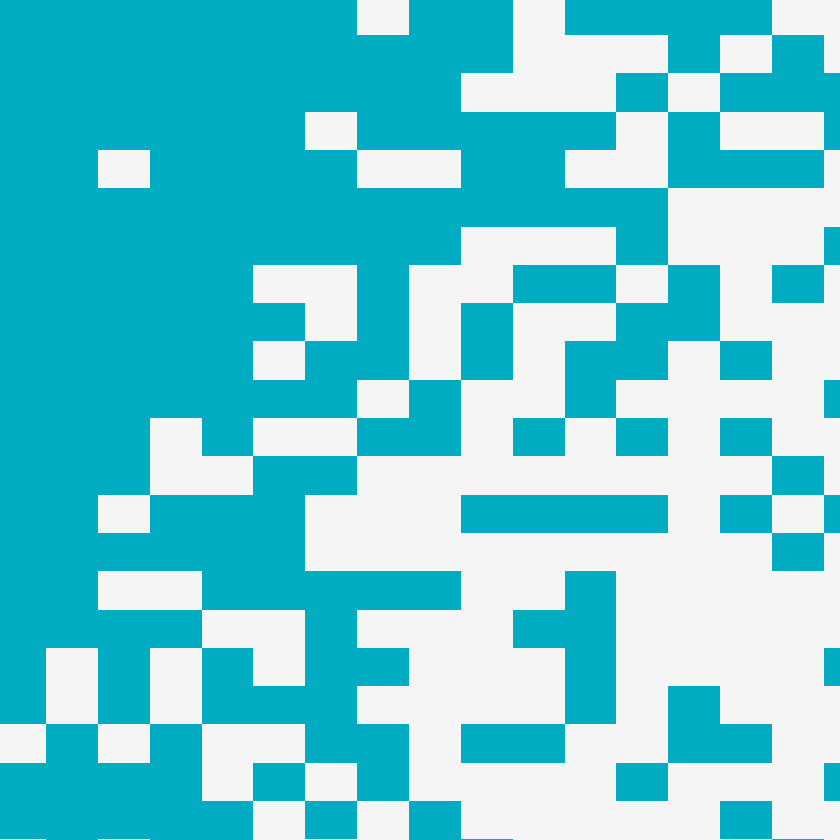

In [42]:
p

In [43]:
pdf("plots/buchong/TCMA_cancer_gene_mutation_01_cancer_gene_sort.pdf", width = 35, height = 15)
draw(p)
dev.off()

pdf 
  2